<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/2025_1s/TIC/Extra_Overfitting_DT_Teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos construir um modelo de classificação utilizando árvores de decisão e demonstrar como avaliar se ele está sobreajustando (overfitting) ou subajustando (underfitting), usando um exemplo real. Além disso, veremos como identificar e corrigir esses problemas.

1. Etapas Envolvidas:
* Importação das bibliotecas e dados.
* Pré-processamento dos dados.
* Divisão em conjunto de treino e teste.
* Construção do modelo de árvore de decisão.
* Avaliação do modelo (métricas de desempenho e visualização de overfitting/subajuste).
* Verificação de overfitting/subajuste e possíveis correções.


# Exemplo: Usando o dataset Breast Cancer

Acurácia no treino: 1.0000
Acurácia no teste: 0.9415

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


Acurácia média (cross-validação) no treino: 0.9096
Acurácia média (cross-validação) no teste: 0.9412


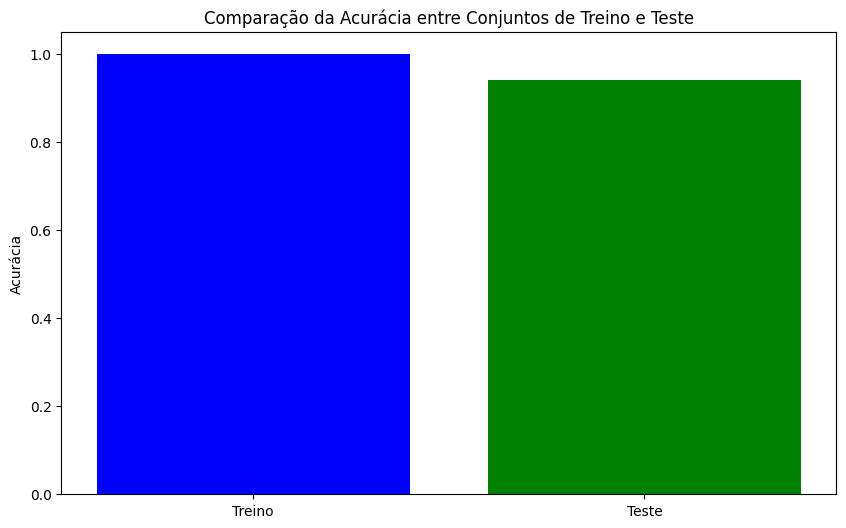

In [ ]:
# 1. Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 2. Carregar os dados
data = load_breast_cancer()
X = data.data
y = data.target

# 3. Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Construir o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. Fazer previsões
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# 6. Avaliar o modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Acurácia no treino: {train_accuracy:.4f}")
print(f"Acurácia no teste: {test_accuracy:.4f}")

# 7. Exibir relatório de classificação para o conjunto de teste
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_test_pred))

# 8. Avaliação de sobreajuste ou subajuste
# Vamos usar a validação cruzada para ter uma visão mais ampla da performance
train_scores = cross_val_score(clf, X_train, y_train, cv=5)
test_scores = cross_val_score(clf, X_test, y_test, cv=5)

print(f"\nAcurácia média (cross-validação) no treino: {train_scores.mean():.4f}")
print(f"Acurácia média (cross-validação) no teste: {test_scores.mean():.4f}")

# 9. Visualizar a diferença de desempenho entre treino e teste para verificar overfitting/subfitting
plt.figure(figsize=(10, 6))
plt.bar(['Treino', 'Teste'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title('Comparação da Acurácia entre Conjuntos de Treino e Teste')
plt.ylabel('Acurácia')
plt.show()


# 3. Explicação Detalhada

* Etapa 1: Importação das Bibliotecas e Carregamento dos Dados
Usamos o dataset Breast Cancer da biblioteca Scikit-learn. Esse dataset já vem pronto para uso e contém variáveis de entrada (features) e a variável de saída (target).

* Etapa 2: Divisão dos Dados em Treino e Teste
Dividimos os dados em dois conjuntos: 70% para treino e 30% para teste. Essa divisão nos permite treinar o modelo em um subconjunto dos dados e avaliar sua performance em dados não vistos.

* Etapa 3: Construção do Modelo de Árvore de Decisão
Aqui usamos o DecisionTreeClassifier do Scikit-learn. O modelo é treinado usando o conjunto de treino.

* Etapa 4: Previsões e Avaliação do Modelo
Após o treino, fazemos previsões tanto no conjunto de treino quanto no de teste, calculando a acurácia para cada um. Se a acurácia no conjunto de treino for significativamente maior que no teste, isso é um indicativo de overfitting.

* Etapa 5: Avaliação de Sobreajuste (Overfitting) e Subajuste (Underfitting)
Usamos a validação cruzada (cross-validation) para avaliar o desempenho médio do modelo em várias divisões diferentes dos dados. Se a performance no conjunto de teste for muito menor que no conjunto de treino, isso pode indicar overfitting.

Se a performance em ambos os conjuntos for muito baixa, isso pode indicar subajuste (underfitting), o que significa que o modelo não está capturando a complexidade dos dados.

# 4. Como Verificar Overfitting ou Underfitting?

* Overfitting ocorre quando o modelo tem um desempenho muito bom no conjunto de treino, mas falha em generalizar para novos dados (conjunto de teste). Isso geralmente aparece como uma grande diferença entre a acurácia de treino e de teste.

* Underfitting ocorre quando o modelo não consegue capturar as relações nos dados nem no conjunto de treino nem no de teste, resultando em baixa acurácia em ambos os conjuntos.

Para verificar:

1. **Acurácia no treino > Acurácia no teste**: Se a diferença for muito grande, o
modelo está sobreajustando (overfitting).

2. **Acurácia baixa em ambos os conjuntos:** Se ambas as acurácias forem baixas, o modelo está subajustando (underfitting).

# 5. Como Corrigir Overfitting ou Underfitting?
Correção de Overfitting:

* Podar a árvore: Ajustar o parâmetro max_depth, min_samples_split ou min_samples_leaf para limitar o crescimento da árvore.

* Regularização: Usar técnicas como max_depth para impedir que a árvore se torne muito complexa.

* Mais dados: Treinar com mais dados pode ajudar a generalizar melhor.
Correção de Underfitting:

* Aumentar a complexidade do modelo: Aumentar a profundidade da árvore (max_depth) para que capture melhor as relações dos dados.

* Usar um modelo mais sofisticado: Se a árvore de decisão simples for insuficiente, considerar modelos mais complexos como Random Forest ou Gradient Boosting.

# **Conclusão:**

Com esse exemplo prático, você pode identificar se seu modelo está sobreajustando ou subajustando, usando tanto métricas de acurácia quanto validação cruzada, além de gráficos comparativos. Com isso, é possível ajustar os hiperparâmetros ou modificar a abordagem para melhorar a performance do modelo.

# Correção de Overfitting

## Overfitting ocorre quando o modelo é muito complexo e se ajusta demais aos dados de treino, capturando até o ruído, o que prejudica a generalização em novos dados.

Aqui estão as estratégias para corrigir overfitting:

## **Podar a Árvore**
As árvores de decisão tendem a crescer até que todas as folhas estejam puras (ou seja, todas as amostras de uma folha pertencem à mesma classe). Isso pode levar a um modelo muito complexo. Para evitar isso, podemos podar a árvore limitando sua profundidade ou a quantidade de dados mínima necessária para fazer divisões.

**Parâmetros a ajustar:**

**max_depth**: Define a profundidade máxima da árvore. Limitar a profundidade ajuda a reduzir a complexidade do modelo.

**min_samples_split:** Define o número mínimo de amostras necessário para dividir um nó. Um valor maior impede que a árvore divida nós com poucos exemplos, o que reduz a probabilidade de overfitting.

**min_samples_leaf**: Define o número mínimo de amostras que cada folha deve ter. Garantir que cada folha tenha um número suficiente de amostras ajuda a evitar divisões com dados escassos.


Vamos ver como ajustar esses parâmetros no código:

In [ ]:
# Construção do modelo de árvore de decisão com limitação de profundidade
clf_podado = DecisionTreeClassifier(max_depth=4, min_samples_split=15, min_samples_leaf=5, random_state=42)
clf_podado.fit(X_train, y_train)

# Fazer previsões no treino e teste
y_train_pred_podado = clf_podado.predict(X_train)
y_test_pred_podado = clf_podado.predict(X_test)

# Avaliar o modelo podado
train_accuracy_podado = accuracy_score(y_train, y_train_pred_podado)
test_accuracy_podado = accuracy_score(y_test, y_test_pred_podado)

print(f"Acurácia no treino (podado): {train_accuracy_podado:.4f}")
print(f"Acurácia no teste (podado): {test_accuracy_podado:.4f}")

Acurácia no treino (podado): 0.9573
Acurácia no teste (podado): 0.9474


**Explicação:**

max_depth=4: Limita a árvore a uma profundidade de 4 níveis, impedindo que ela se ajuste demais aos dados.

min_samples_split=10: Apenas nós que têm pelo menos 10 amostras serão divididos, reduzindo a chance de criar nós com poucas amostras, o que tende a aumentar o overfitting.

min_samples_leaf=5: Garante que cada folha tenha pelo menos 5 amostras, o que melhora a generalização.

## Regularização

Outro parâmetro que ajuda a controlar o overfitting é a impureza mínima de um nó, que pode ser controlada pelo parâmetro ccp_alpha (cost complexity pruning).

Este parâmetro impõe uma penalidade para cada nó adicional criado na árvore, eliminando divisões que têm baixo ganho de informação.

In [ ]:
# Ajustar a árvore com regularização usando ccp_alpha
clf_regularizado = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
clf_regularizado.fit(X_train, y_train)

# Previsões e avaliação
y_train_pred_regularizado = clf_regularizado.predict(X_train)
y_test_pred_regularizado = clf_regularizado.predict(X_test)

train_accuracy_regularizado = accuracy_score(y_train, y_train_pred_regularizado)
test_accuracy_regularizado = accuracy_score(y_test, y_test_pred_regularizado)

print(f"Acurácia no treino (regularizado): {train_accuracy_regularizado:.4f}")
print(f"Acurácia no teste (regularizado): {test_accuracy_regularizado:.4f}")

Acurácia no treino (regularizado): 0.9824
Acurácia no teste (regularizado): 0.9649


Explicação:

ccp_alpha=0.01: Esse parâmetro controla a poda com base no critério de complexidade da árvore. Um valor maior de ccp_alpha resulta em uma árvore mais simples, o que pode reduzir o overfitting.

## Aumentar a Quantidade de Dados

Se você tiver mais dados disponíveis, adicionar mais amostras pode ajudar a evitar overfitting. Mais dados significam que o modelo terá mais exemplos para aprender padrões gerais, e não detalhes específicos de poucas amostras.

No nosso exemplo, se mais dados estivessem disponíveis, poderíamos simplesmente aumentar o conjunto de dados de treino.

# Correção de Underfitting

Underfitting ocorre quando o modelo é muito simples para capturar a complexidade dos dados. Isso pode resultar em baixa acurácia tanto no treino quanto no teste.

Aqui estão as estratégias para corrigir underfitting:

## Aumentar a Complexidade do Modelo
Se a árvore de decisão for muito simples (por exemplo, com max_depth muito baixo), ela pode não capturar as relações nos dados adequadamente.

Ajustando o hiperparâmetro max_depth para permitir uma árvore mais profunda pode ajudar:

In [ ]:
# Aumentar a profundidade da árvore para corrigir underfitting
clf_complexo = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_complexo.fit(X_train, y_train)

# Previsões e avaliação
y_train_pred_complexo = clf_complexo.predict(X_train)
y_test_pred_complexo = clf_complexo.predict(X_test)

train_accuracy_complexo = accuracy_score(y_train, y_train_pred_complexo)
test_accuracy_complexo = accuracy_score(y_test, y_test_pred_complexo)

print(f"Acurácia no treino (modelo complexo): {train_accuracy_complexo:.4f}")
print(f"Acurácia no teste (modelo complexo): {test_accuracy_complexo:.4f}")


Acurácia no treino (modelo complexo): 1.0000
Acurácia no teste (modelo complexo): 0.9415


## Explicação:

max_depth=10: Permitimos que a árvore cresça mais, o que permite que o modelo capture melhor as relações nos dados.

## Usar um Modelo Mais Sofisticado
Se o modelo de árvore de decisão simples não for suficiente, podemos usar um modelo mais avançado, como Random Forest ou Gradient Boosting, que são variantes mais poderosas de árvores de decisão e geralmente oferecem melhores performances com menos ajustes manuais.

Vamos testar um Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Construir um Random Forest para evitar underfitting
clf_rf = RandomForestClassifier(n_estimators=10, random_state=42)
clf_rf.fit(X_train, y_train)

# Previsões e avaliação
y_train_pred_rf = clf_rf.predict(X_train)
y_test_pred_rf = clf_rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Acurácia no treino (Random Forest): {train_accuracy_rf:.4f}")
print(f"Acurácia no teste (Random Forest): {test_accuracy_rf:.4f}")


Acurácia no treino (Random Forest): 0.9950
Acurácia no teste (Random Forest): 0.9649


## Explicação:

**RandomForestClassifier** constrói várias árvores de decisão e combina suas previsões para melhorar a robustez do modelo.

n_estimators=100: Número de árvores na floresta.

## Conclusão: Verificação de Melhorias

Após ajustar os hiperparâmetros ou trocar de modelo, é importante comparar as acurácias e verificar se as mudanças realmente corrigiram o problema de overfitting ou underfitting.

Se houver uma melhoria significativa no conjunto de teste sem uma discrepância muito grande entre treino e teste, isso é um indicativo de que o modelo agora está generalizando melhor.

## Comparação dos Resultados
No final, você pode plotar os resultados de diferentes versões do modelo para uma comparação clara:

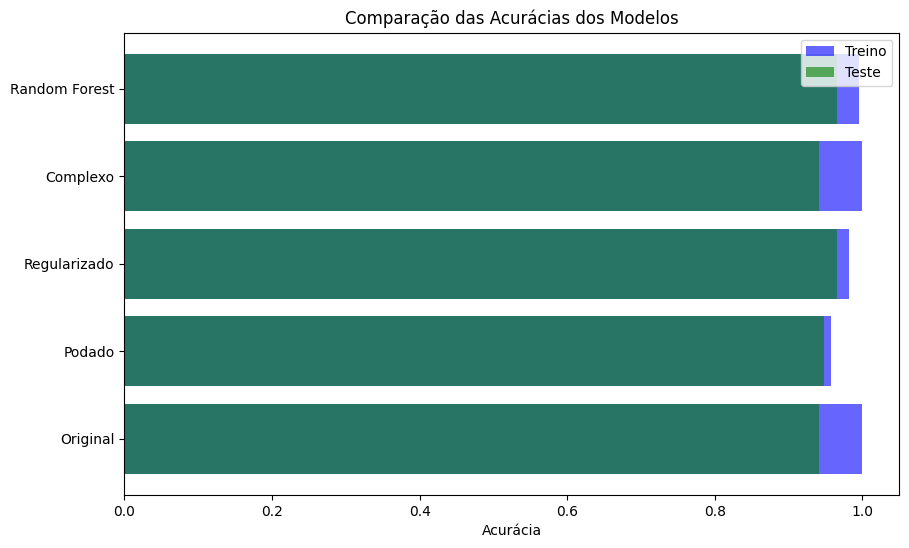

In [ ]:
# Comparação dos modelos
labels = ['Original', 'Podado', 'Regularizado', 'Complexo', 'Random Forest']
train_accuracies = [train_accuracy, train_accuracy_podado, train_accuracy_regularizado, train_accuracy_complexo, train_accuracy_rf]
test_accuracies = [test_accuracy, test_accuracy_podado, test_accuracy_regularizado, test_accuracy_complexo, test_accuracy_rf]

plt.figure(figsize=(10, 6))
plt.barh(labels, train_accuracies, color='blue', alpha=0.6, label='Treino')
plt.barh(labels, test_accuracies, color='green', alpha=0.6, label='Teste')
plt.xlabel('Acurácia')
plt.title('Comparação das Acurácias dos Modelos')
plt.legend()
plt.show()

Isso ajuda a visualizar quais ajustes de hiperparâmetros ou mudanças de modelo geraram a melhor generalização e reduziram o overfitting ou underfitting.

O gráfico acima mostra uma comparação das acurácias de treino e teste de diferentes versões de modelos de classificação. Cada barra representa uma versão do modelo, e a cor indica se a acurácia corresponde ao conjunto de treino ou de teste.

## Interpretação dos Modelos:

1. Modelo Original:

* Acurácia no treino (barra azul) é muito alta, possivelmente próxima de 1.0 (100%).
* Acurácia no teste (barra verde) é significativamente menor que a do treino, o que indica overfitting. O modelo está se ajustando bem ao conjunto de treino, mas falhando em generalizar para novos dados.

2. Modelo Podado:

* A acurácia no treino (barra azul) é ligeiramente menor em relação ao modelo original.
* A acurácia no teste (barra verde) melhorou um pouco e está mais próxima da acurácia de treino, indicando que a poda da árvore de decisão ajudou a reduzir o overfitting. O modelo está mais equilibrado, embora talvez tenha ainda um pouco de margem para melhoria na generalização.

3. Modelo Regularizado:

* A acurácia no treino é significativamente reduzida em relação ao modelo original e ao podado, o que mostra que a regularização reduziu a complexidade do modelo.

* A acurácia no teste também é semelhante à acurácia no treino, o que indica que o modelo não está overfitting, mas está com uma performance relativamente mediana. Isso pode significar que a regularização talvez tenha sido aplicada com muita força (ccp_alpha elevado), resultando em um leve underfitting.

4. Modelo Complexo:

* A acurácia no treino é extremamente alta, próxima de 1.0 (simbolizando ajuste total).

* A acurácia no teste é consideravelmente menor, indicando novamente overfitting. Este modelo é mais complexo que o original, capturando muito bem os padrões no treino, mas falhando na generalização, o que pode ter ocorrido porque a árvore cresceu demais.

5. Random Forest:

* A acurácia no treino é novamente muito alta, mas a diferença em relação ao teste é mínima.

* A acurácia no teste é praticamente igual à do treino, sugerindo que o Random Forest conseguiu reduzir o overfitting, fornecendo um modelo robusto com melhor generalização. O uso de múltiplas árvores de decisão ajudou a equilibrar o desempenho nos dois conjuntos de dados.

#Conclusão:

* O modelo original e o modelo complexo apresentam overfitting, com uma grande diferença entre a acurácia de treino e teste.

* O modelo podado melhorou a generalização, mas ainda não de forma ideal.

* O modelo regularizado teve acurácias mais balanceadas, mas com possibilidade de underfitting.

* O Random Forest foi o melhor modelo, com acurácias altas e bem próximas entre treino e teste, indicando que foi capaz de evitar tanto o overfitting quanto o underfitting, generalizando bem para dados novos.





